<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy import stats
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import SCORERS
#list(SCORERS.keys())
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
from yellowbrick.regressor import PredictionError

In [64]:
from yellowbrick.regressor import ManualAlphaSelection

# Data Gathering

In [3]:
df = pd.read_csv("car_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape

(301, 9)

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [9]:
df["Age"] = 2021 - df.Year


In [10]:
df.drop("Year", axis=1, inplace=True)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.590,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.540,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.850,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.150,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.870,42450,Diesel,Dealer,Manual,0,7
5,vitara brezza,9.25,9.830,2071,Diesel,Dealer,Manual,0,3
6,ciaz,6.75,8.120,18796,Petrol,Dealer,Manual,0,6
7,s cross,6.50,8.610,33429,Diesel,Dealer,Manual,0,6
8,ciaz,8.75,8.890,20273,Diesel,Dealer,Manual,0,5
9,ciaz,7.45,8.920,42367,Diesel,Dealer,Manual,0,6


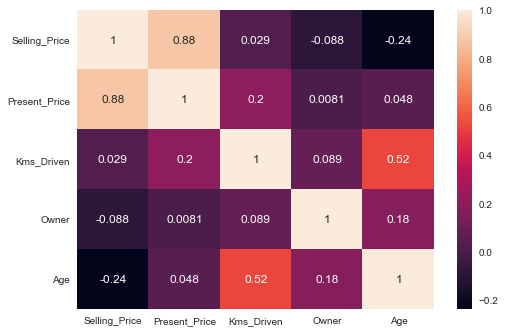

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
df.drop(["Car_Name"], axis=1, inplace=True)


In [14]:
df=pd.get_dummies(df, drop_first=True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [16]:
X = df.drop("Selling_Price", axis=True)
y = df["Selling_Price"]

### Splitting data into training and testing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [31]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


In [32]:
scaler=MinMaxScaler()

In [33]:
scaler.fit(X_train)

MinMaxScaler()

In [34]:
X_train=scaler.transform(X_train)

In [35]:

X_test=scaler.transform(X_test)

##  Model Building (Linear Regression)

In [36]:
model=LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
model.coef_

array([38.44271291, -2.78317245, -2.77598775, -6.28997736,  2.5212903 ,
        0.31552431, -1.21362447, -1.75926213])

In [39]:
coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,38.442713
Kms_Driven,-2.783172
Owner,-2.775988
Age,-6.289977
Fuel_Type_Diesel,2.521290
Fuel_Type_Petrol,0.315524
Seller_Type_Individual,-1.213624
Transmission_Manual,-1.759262


In [40]:
model.intercept_

4.8293029080878505

In [42]:
y_pred = model.predict(X_test)


In [50]:
y_train_pred = model.predict(X_train)

In [43]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [45]:
eval_metrics(y_test, y_pred)   

Model testing performance:
--------------------------
R2_score 	: 0.7958287651535143
MAE 		: 1.2653790800255915
MSE 		: 3.211241714105237
RMSE 		: 1.7919937818266103


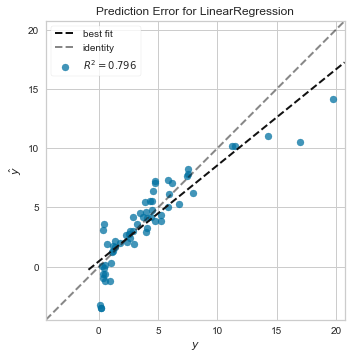

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show() 

In [51]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,1.741655,1.791994
mae,1.197656,1.265379
mse,3.033361,3.211242
R2,0.892369,0.795829


In [55]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"Residul":y_test - y_pred})

result_sample = results.head(25)
result_sample

,Actual,Predicted,Residul
58,4.10,3.265176,0.834824
48,5.80,5.064793,0.735207
40,5.85,7.317541,-1.467541
118,1.10,1.250937,-0.150937
68,4.35,5.553307,-1.203307
159,0.45,3.571521,-3.121521
84,3.49,4.518117,-1.028117
97,17.00,10.552430,6.447570
91,11.25,10.161858,1.088142
200,0.10,-3.192037,3.292037


# Interpret the model


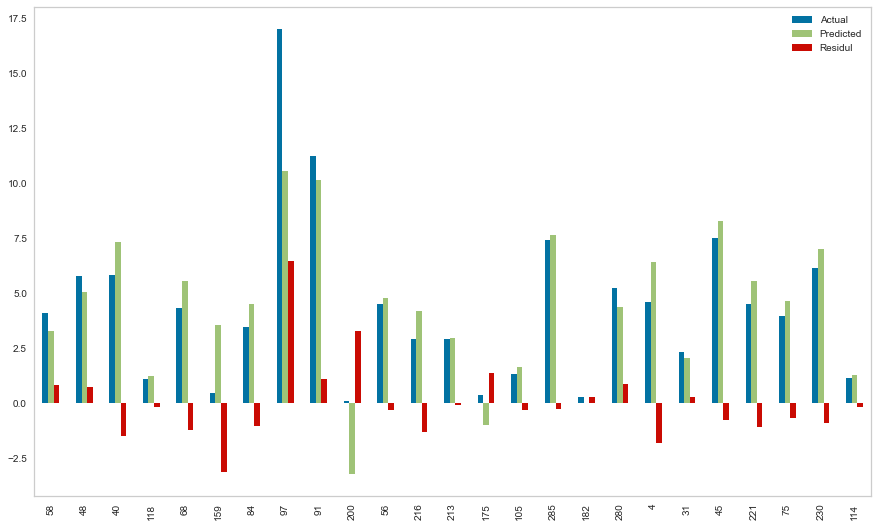

In [56]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

# Model Evaluation

# Ridge

In [57]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [58]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [59]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [60]:
ridge_cv_model.alpha_

0.08

In [61]:
alpha_space = np.linspace(0.01, 10, 100)
ridge_cv_model = RidgeCV(alphas=alpha_space, cv=10)
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [62]:
ridge_cv_model.alpha_

0.1109090909090909

In [66]:
y_pred=ridge_cv_model.predict(X_test)

In [68]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7780192841365032
MAE 		: 1.3077844186157213
MSE 		: 3.491352418198262
RMSE 		: 1.8685161005991524


In [69]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.741655,1.868516
mae,1.197656,1.307784
mse,3.033361,3.491352
R2,0.892369,0.778019


# Lasso

In [70]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [71]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10, ma

In [72]:
y_pred=lasso_cv_model.predict(X_test)

In [73]:
eval_metrics(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7908559180519448
MAE 		: 1.2541168215274445
MSE 		: 3.2894555431122203
RMSE 		: 1.8136856241124646


In [74]:
lasso_cv_model.alpha_

0.01

In [75]:
y_train_pred = lasso_cv_model.predict(X_train)

In [76]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.755475,1.813686
mae,1.199702,1.254117
mse,3.081691,3.289456
R2,0.890654,0.790856


## Elastic-Net 

In [77]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [78]:
elastic_model.l1_ratio

0.5

In [79]:
elastic_model.alpha

1.0

In [80]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.23905725441172476
MAE 		: 3.0458386411323124
MSE 		: 21.44561130421816
RMSE 		: 4.630940650042728


In [81]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.1537779732129294
MAE 		: 2.6721484304787086
MSE 		: 13.309531452148606
RMSE 		: 3.6482230540564


In [82]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,4.630941,3.648223
mae,3.045839,2.672148
mse,21.445611,13.309531
R2,0.239057,0.153778


In [83]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [84]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [85]:
elastic_cv_model.alpha_

0.01

In [86]:
elastic_cv_model.l1_ratio_

1.0

In [87]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8906540698211177
MAE 		: 1.1997021725909625
MSE 		: 3.0816908761008097
RMSE 		: 1.7554745444183488


In [88]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7908559180519448
MAE 		: 1.2541168215274445
MSE 		: 3.2894555431122203
RMSE 		: 1.8136856241124646


In [89]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,1.755475,1.813686
mae,1.199702,1.254117
mse,3.081691,3.289456
R2,0.890654,0.790856


In [90]:
summary=pd.concat([ls, rcs, lcs, ecs], axis = 1)
summary

,lm_train,lm_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
rmse,1.741655,1.791994,1.741655,1.868516,1.755475,1.813686,1.755475,1.813686
mae,1.197656,1.265379,1.197656,1.307784,1.199702,1.254117,1.199702,1.254117
mse,3.033361,3.211242,3.033361,3.491352,3.081691,3.289456,3.081691,3.289456
R2,0.892369,0.795829,0.892369,0.778019,0.890654,0.790856,0.890654,0.790856
